In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

import pickle
import soundfile as sf
import IPython.display as ipd

from constants import *
from train import train_model
from phase_loss import phase_loss
from dataset import build_data_loaders
from early_stopper import EarlyStopper
from predict import predict, get_phase, make_wav
from plotter import plot_loss, plot_heatmaps, plot_waves

from models.model_18 import Model_18

In [2]:
USE_GPU = True

num_epochs = 250
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if not USE_GPU:
    device = torch.device("cpu")
    num_epochs = 1

In [3]:
representation = "polar"
part = "abs"
with open("dataset/features/min_max.pkl", "rb") as handle:
    min_max = pickle.load(handle)

model = Model_18()
train_data_loader, test_data_loader = build_data_loaders(
    representation, min_max, part=part)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=3e-4)
es = EarlyStopper(7, 3e-6)

In [4]:
model, history = train_model(
    model,
    criterion,
    optimizer,
    device,
    train_data_loader, test_data_loader,
    es,
    num_epochs=num_epochs,
    phase_loss_fun=None,
    minimaxi=(min_max["ney"]["min"]["abs"],
              min_max["ney"]["max"]["abs"])
)

Starting training...
E: 001/250	 T: 1633.177937	 V: 795.730842
E: 002/250	 T: 502.181533	 V: 416.647430
E: 003/250	 T: 242.165822	 V: 206.160626
E: 004/250	 T: 143.722455	 V: 86.649843
E: 005/250	 T: 95.423567	 V: 73.497963
E: 006/250	 T: 68.320730	 V: 89.502757
E: 007/250	 T: 51.284236	 V: 56.376148
E: 008/250	 T: 40.134218	 V: 48.989408
E: 009/250	 T: 32.142455	 V: 46.729045
E: 010/250	 T: 26.302009	 V: 31.484493
E: 011/250	 T: 21.998437	 V: 34.188562
E: 012/250	 T: 18.569428	 V: 26.208439
E: 013/250	 T: 16.008869	 V: 22.331316
E: 014/250	 T: 13.895621	 V: 17.712345
E: 015/250	 T: 12.088202	 V: 11.945131
E: 016/250	 T: 10.637357	 V: 14.337822
E: 017/250	 T: 9.481319	 V: 11.211855
E: 018/250	 T: 8.510833	 V: 16.018935
E: 019/250	 T: 7.572819	 V: 17.300390
E: 020/250	 T: 6.854373	 V: 11.129312
E: 021/250	 T: 6.278578	 V: 14.295637
E: 022/250	 T: 5.689549	 V: 13.042967
E: 023/250	 T: 5.145492	 V: 10.236831
E: 024/250	 T: 4.738589	 V: 19.643591
E: 025/250	 T: 4.466970	 V: 9.913901
E: 026

In [5]:
model.to(torch.device("cpu"))

Model_18(
  (enc1): ConvBlock(
    (conv): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (sig): Sigmoid()
  )
  (enc2): ConvBlock(
    (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (sig): Sigmoid()
  )
  (enc3): ConvBlock(
    (conv): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (sig): Sigmoid()
  )
  (enc4): ConvBlock(
    (conv): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (sig): Sigmoid()
  )
  (bottleneck): ConvBlock(
    (conv): Conv2d(512, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn): BatchNorm

In [6]:
model_name = "Magnitude_18_64"
model_scripted = torch.jit.script(model)
model_scripted.save(f"trained_models/{model_name}.pt")

In [ ]:
model = torch.jit.load(f"trained_models/{model_name}.pt")
model.eval()

In [ ]:
del model
torch.cuda.empty_cache()

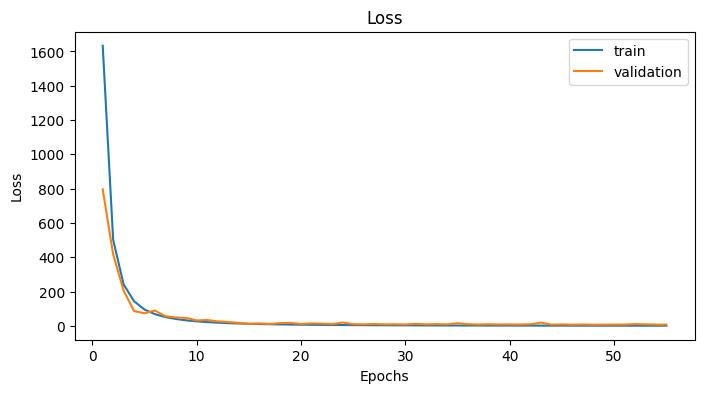

In [7]:
plot_loss(history, "Loss", start=0)

In [8]:
predictions_0, predictions_1, targets_0, targets_1 = predict(model,
                                                             test_data_loader,
                                                             min_max,
                                                             representation,
                                                             limit=12,
                                                             part=part)

08_Gtr_G_S_3/chunk_0, 08_Gtr_G_S_3/chunk_1, 08_Gtr_G_S_3/chunk_2, 08_Gtr_G_S_3/chunk_3
08_Ney_G_S_3/chunk_0, 08_Ney_G_S_3/chunk_1, 08_Ney_G_S_3/chunk_2, 08_Ney_G_S_3/chunk_3
--------------------------------------------------
08_Gtr_G_S_3/chunk_4, 08_Gtr_G_S_3/chunk_5, 08_Gtr_G_S_3/chunk_6, 08_Gtr_G_S_3/chunk_7
08_Ney_G_S_3/chunk_4, 08_Ney_G_S_3/chunk_5, 08_Ney_G_S_3/chunk_6, 08_Ney_G_S_3/chunk_7
--------------------------------------------------
08_Gtr_G_S_3/chunk_8, 08_Gtr_G_S_3/chunk_9, 08_Gtr_G_S_3/chunk_10, 08_Gtr_G_S_3/chunk_11
08_Ney_G_S_3/chunk_8, 08_Ney_G_S_3/chunk_9, 08_Ney_G_S_3/chunk_10, 08_Ney_G_S_3/chunk_11
--------------------------------------------------


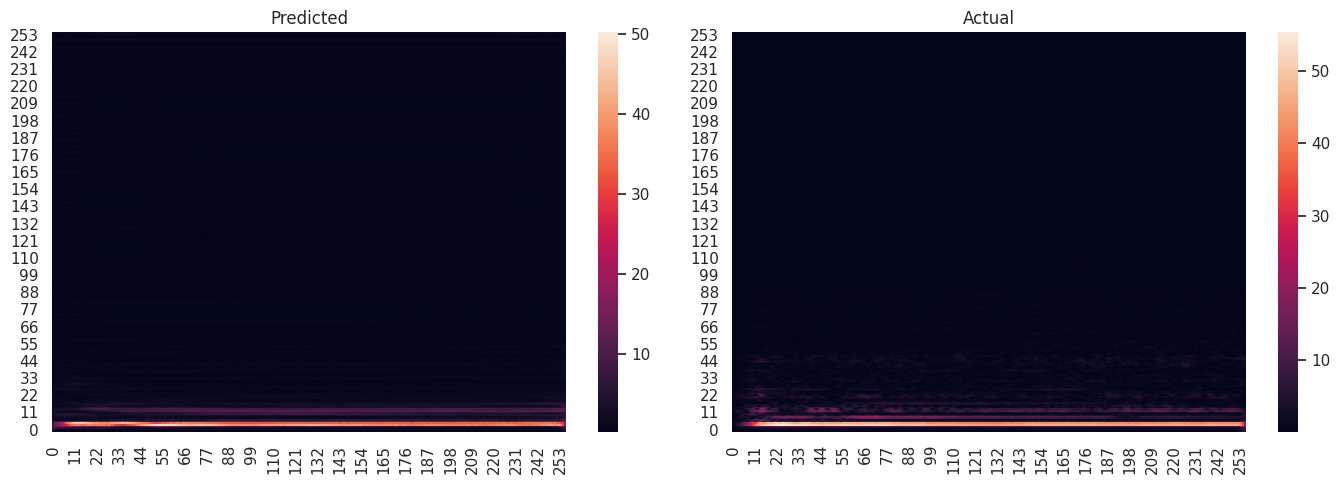

In [9]:
plot_heatmaps(predictions_0[0], targets_0[0])

In [14]:
_, test_data_loader_phase = build_data_loaders(
    representation, min_max, part="ang")
phases = get_phase(test_data_loader_phase, instrument="gtr", limit=12)

08_Gtr_G_S_3/chunk_0, 08_Gtr_G_S_3/chunk_1, 08_Gtr_G_S_3/chunk_2, 08_Gtr_G_S_3/chunk_3
--------------------------------------------------
08_Gtr_G_S_3/chunk_4, 08_Gtr_G_S_3/chunk_5, 08_Gtr_G_S_3/chunk_6, 08_Gtr_G_S_3/chunk_7
--------------------------------------------------
08_Gtr_G_S_3/chunk_8, 08_Gtr_G_S_3/chunk_9, 08_Gtr_G_S_3/chunk_10, 08_Gtr_G_S_3/chunk_11
--------------------------------------------------


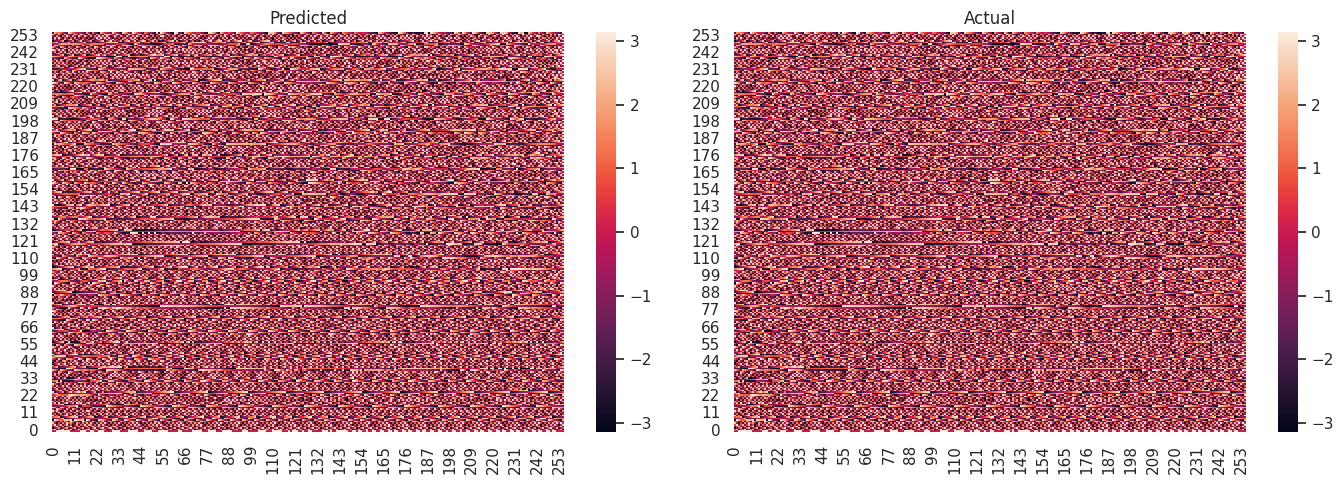

In [15]:
# plot_heatmaps(predictions_1[0], targets_1[0])
plot_heatmaps(phases[0], phases[0])

61376 61376


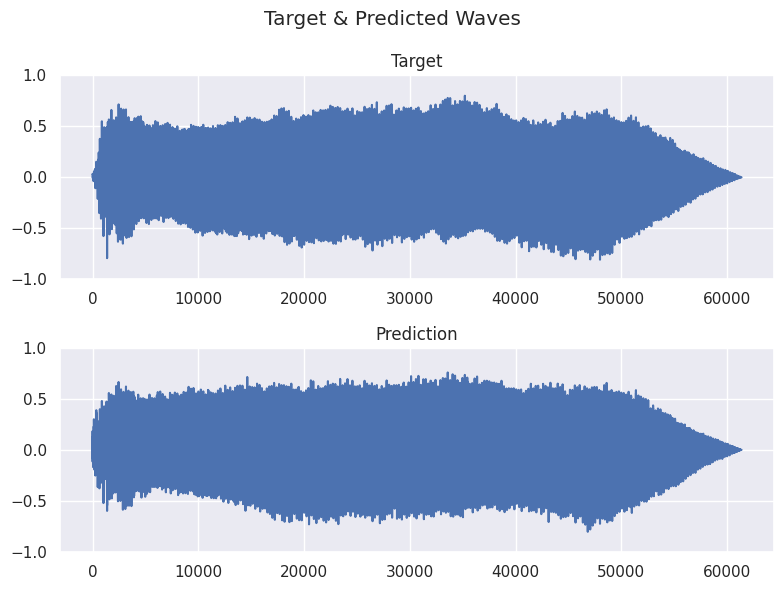

In [16]:
# wave_prediction = make_wav(predictions_0, predictions_1, representation)
wave_prediction = make_wav(predictions_0, phases, representation)
# wave_target = make_wav(targets_0, targets_1, representation)
wave_target = make_wav(targets_0, phases, representation)
print(len(wave_prediction), len(wave_target))
plot_waves(wave_target, wave_prediction)

In [ ]:
ipd.Audio(wave_target, rate=SR)

In [ ]:
ipd.Audio(wave_prediction, rate=SR)

In [17]:
sf.write("z_target.wav", wave_target, SR, format="wav")
sf.write("z_prediction.wav", wave_prediction, SR, format="wav")